In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
import joblib
import time
import matplotlib.pyplot as plt

In [ ]:
df_original = pd.read_csv('/content/Diseases_Symptoms.csv')

# Convertimos los nombres de las columnas a minúsculas para evitar problemas de mayúsculas
df_original.columns = [col.lower() for col in df_original.columns]

df_original.head()


,code,name,symptoms,treatments
0,1,Panic disorder,"Palpitations, Sweating, Trembling, Shortness of breath, Fear of losing control, Dizziness","Antidepressant medications, Cognitive Behavioral Therapy, Relaxation Techniques"
1,2,Vocal cord polyp,"Hoarseness, Vocal Changes, Vocal Fatigue","Voice Rest, Speech Therapy, Surgical Removal"
2,3,Turner syndrome,"Short stature, Gonadal dysgenesis, Webbed neck, Lymphedema","Growth hormone therapy, Estrogen replacement therapy, Cardiac and renal evaluations"
3,4,Cryptorchidism,"Absence or undescended testicle(s), empty scrotum, smaller or underdeveloped testicle(s), inguinal hernia, abnormal positioning of the testicle(s) (higher in the groin area)","Observation and monitoring (in cases of mild or transient cryptorchidism), hormone therapy (to stimulate testicular descent), surgical intervention (orchiopexy) to reposition the testicle(s) into the scrotum, if necessary, performed around the age of 6 to 12 months, open or laparoscopic surgery (in cases of high or persistent cryptorchidism), testicular prostheses (in cases of absent or non-functional testicles), regular follow-up visits with a urologist or pediatric surgeon"
4,5,Ethylene glycol poisoning-1,"Nausea, vomiting, abdominal pain, General malaise, weakness, Increased thirst, frequent urination","Supportive Measures, Gastric Decontamination, Antidote Administration, Hemodialysis"


In [ ]:
def process_multivalued_column(df, column_name):
    unique_values = set()
    df[column_name] = df[column_name].fillna('')
    for values in df[column_name]:
        unique_values.update(value.strip().lower() for value in values.split(','))  # Convertir a minúsculas

    unique_values = sorted(unique_values)
    for value in unique_values:
        df[value] = df[column_name].apply(lambda x: 1 if value in x.lower() else 0)  # Comparar en minúsculas

    # Convertimos nombres de columnas a minúsculas para coherencia
    df.columns = [col.lower() for col in df.columns]

    return df.drop(columns=[column_name])


# Procesar los síntomas
df_symptoms = process_multivalued_column(df_original.copy(), "symptoms")

# Procesar los tratamientos
df_treatments = process_multivalued_column(df_original.copy(), "treatments")

# Guardar los datasets en archivos CSV separados
df_symptoms.to_csv("Diseases_Symptoms_Processed.csv", index=False)
df_treatments.to_csv("Diseases_Treatments_Processed.csv", index=False)

# Mensaje final indicando que el proceso ha finalizado
print("Archivos procesados y guardados correctamente.")


Archivos procesados y guardados correctamente.


In [ ]:
df_symptoms.head()

,code,name,treatments,abdominal cramps,abdominal distension,abdominal or back pain,abdominal or flank pain,abdominal pain,abdominal pain (often in the upper right quadrant),abdominal pain or bloating,abdominal pain or cramping,abdominal pain or cramps,abdominal pain or discomfort,abdominal pain or swelling,abdominal swelling (ascites),abdominal swelling or pain,abdominal tenderness,abnormal bleeding or spotting,abnormal discharge from the genitals,abnormal positioning of the testicle(s) (higher in the groin area),abnormal positioning of the urethral opening on the underside of the penis,abnormal sweating,abnormal vaginal bleeding,abnormal vaginal bleeding outside of the menstrual period,abscess formation,absence or undescended testicle(s),acid reflux,acidic taste,acne,age-related factors,altered judgment,altered perception of reality,altered perception of time,anal or vaginal discharge,and abnormal head positioning,and oily patches of skin,and other organs,and pain in the hand and fingers,and psychiatric symptoms,and signs of fluid overload,and tenderness along a vein,anemia,anxiety,anxiety or paranoia (in some individuals),anxiety) when attempting to stop or reduce use,apid breathing,arm,avoidance or restriction of certain foods or entire food groups,back or flank pain,back pain,backache,bad breath,bad taste,balance problems,bedwetting (in children),benign tumors in various organs,black,bleeding,bleeding after menopause,bleeding after sexual intercourse,bleeding gums,bleeding tendencies,blind spots,blindness,blistering,bloating,blood in the urine,blood in urine,blood in urine or stool,bloodshot eyes,bloody or black stools,bloody stool,bloody stools,blurred distance vision,blurred or decreased vision,blurred or distorted central vision,blurred or distorted vision,blurred or hazy vision,blurred vision,blurred vision (if the chalazion affects the line of sight),blurred vision when focusing on near objects,blurry vision,body aches,bone pain,bowel movement difficulties,bowel obstruction,brain,breast lump,breast pain,breast tenderness,brief muscle contractions or jerks,bruising,burning,burning sensation during urination,challenges with social interaction,changes in appetite or sleep patterns,changes in bowel movements,changes in bowel or bladder habits,changes in breast size or shape,changes in coordination or balance,changes in heart rate,changes in sensory experiences,changes in skin color or temperature,changes in skin temperature,changes in sleep and appetite),changes in testicular size or shape,changes in vision,chest congestion,chest discomfort or tightness,chest or back pain,chest pain,chest pain (sharp and stabbing),chest pain (sharp or dull),chest pain or angina,chest pain or discomfort,chest pain or discomfort (angina),chest pain or pressure,chest tightness,chest wall bruising,chills,choking or gagging,cholecystectomy,chronic back pain and stiffness,chronic constipation,chronic cough,chronic diarrhea,chronic pain,clicking or popping sounds in the jaw joint,cloudy or bloody urine,cloudy or hazy eyes,cloudy urine,clumpy vaginal discharge (resembling cottage cheese),cognitive,cognitive decline or dementia-like symptoms,cognitive difficulties,cognitive difficulties (fibro fog),cognitive impairments,cognitive or developmental problems,color vision impairment,communication difficulties,compulsive use of opioids,confusion,congestion,constipation,continued use despite negative consequences (such as legal issues,continued use despite negative consequences (such as relationship problems,corneal abrasions or ulcers,cough,cough with phlegm or pus,coughing,coughing or wheezing,coughing up blood or pink-tinged sputum,cramping,cravings for alcohol,curtain-like shadow over vision,curvature of the penis,cyanosis (bluish discoloration of the skin),dandruff,dark or empty areas in the visual field,dark spots on the teeth,dark urine,daytime sleepiness,decreased appetite,decreased exercise tolerance,decreased oxygen levels,decreased urine outp

In [ ]:
df_treatments.head()

,code,name,symptoms,,acamprosate),accommodations and modifications in school,ace inhibitors) to manage blood pressure and reduce the risk of rupture,acetaminophen,activated charcoal (if indicated),activated charcoal administration,acupuncture,addressing any medical complications,addressing any underlying psychological or medical conditions,addressing associated medical issues,addressing co-occurring mental health conditions,addressing complications (such as anemia),addressing electrolyte imbalance,addressing nutritional deficiencies,addressing underlying causes (e.g.,addressing underlying issues,addressing underlying nutritional deficiencies,addressing underlying psychological or social factors,addressing underlying risk factors,addressing underlying stressors or psychological factors,adequate hydration,adjusting insulin dosage and regimen,adjusting medication dosage,adjusting medication or insulin dosage,administration of antidotes (if available and appropriate),administration of rabies vaccine and immunoglobulin,airway management,airway management),alcohol septal ablation (destruction of excess heart muscle with alcohol injection),allergen avoidance,allergy management,alpha agonists,alternative approaches (such as acupuncture or herbal remedies),alternative therapies (such as acupuncture or herbal remedies),amphotericin b,and address underlying causes. it may include: lifestyle modifications (e.g.,and antibiotics if infection is present),and anticonvulsants),and dairy products),and disopyramide),and maintaining a healthy weight),and management of any underlying conditions.,and may include medications (such as decongestants,and may include surgery,and medications as necessary,and mirror therapy),and non-sharp objects that are likely to pass through the digestive tract without complications),and other symptoms),and potassium),and respiratory support),anthelmintic medication,anti-anxiety drugs),anti-inflammatory medications,anti-nausea medications,anti-vertigo drugs),antiarrhythmics),antibiotic ointments (if infected),antibiotic or antifungal eye drops,antibiotic or antifungal eye drops (if infection is present),antibiotic therapy (oral or intravenous),antibiotics,antibiotics (azithromycin,antibiotics (dual therapy with ceftriaxone and azithromycin),antibiotics (for associated infections),antibiotics (for infection),antibiotics (if bacterial infection is present),antibiotics (if bacterial infection),antibiotics (if infection is present),antibiotics (in bacterial cases),antibiotics (oral or intravenous) to treat the underlying bacterial infection,antibiotics (such as azithromycin or ceftriaxone),antibiotics (such as fluoroquinolones,antibiotics (such as penicillin or erythromycin),antibiotics (to treat streptococcal infections),antibiotics (usually penicillin),antibiotics safe for pregnancy,antibiotics to treat infection,antibiotics),anticholinergics),anticoagulant medications,anticoagulant therapy to prevent clot formation or progression,anticoagulants),anticonvulsants,anticonvulsants),antidepressant medication (if recommended by a healthcare professional),antidepressant medications,antidepressants,antidote (if available),antidote administration,antifibrotic drugs),antifungal creams,antifungal medication (e.g.,antifungal medication eg amphotericin b,antihistamine eye drops,antihistamines,antiparasitic medications,antiparasitic medications (if parasitic infection is identified),antiperspirants,antiplatelet medications,antipsychotics),antithyroid drugs),antiviral creams,antiviral drugs),antiviral medications,antiviral medications (if applicable),antiviral medications (if caused by a viral infection),antiviral medications (in some cases),antiviral medications (topical or oral),antivirals),applying cold or hot compresses,applying heat or cold,applying topical antifungal or antibacterial creams,arthroscopic surgery,artificial tears,assistive devices,assistive devices (such as braces or supports),assistive listening devices,avoidance

In [ ]:
df_symptoms = df_symptoms.drop(columns=['treatments'])

In [ ]:
df_treatments = df_treatments.drop(columns=['symptoms'])

In [ ]:
df_symptoms.head()

,code,name,abdominal cramps,abdominal distension,abdominal or back pain,abdominal or flank pain,abdominal pain,abdominal pain (often in the upper right quadrant),abdominal pain or bloating,abdominal pain or cramping,abdominal pain or cramps,abdominal pain or discomfort,abdominal pain or swelling,abdominal swelling (ascites),abdominal swelling or pain,abdominal tenderness,abnormal bleeding or spotting,abnormal discharge from the genitals,abnormal positioning of the testicle(s) (higher in the groin area),abnormal positioning of the urethral opening on the underside of the penis,abnormal sweating,abnormal vaginal bleeding,abnormal vaginal bleeding outside of the menstrual period,abscess formation,absence or undescended testicle(s),acid reflux,acidic taste,acne,age-related factors,altered judgment,altered perception of reality,altered perception of time,anal or vaginal discharge,and abnormal head positioning,and oily patches of skin,and other organs,and pain in the hand and fingers,and psychiatric symptoms,and signs of fluid overload,and tenderness along a vein,anemia,anxiety,anxiety or paranoia (in some individuals),anxiety) when attempting to stop or reduce use,apid breathing,arm,avoidance or restriction of certain foods or entire food groups,back or flank pain,back pain,backache,bad breath,bad taste,balance problems,bedwetting (in children),benign tumors in various organs,black,bleeding,bleeding after menopause,bleeding after sexual intercourse,bleeding gums,bleeding tendencies,blind spots,blindness,blistering,bloating,blood in the urine,blood in urine,blood in urine or stool,bloodshot eyes,bloody or black stools,bloody stool,bloody stools,blurred distance vision,blurred or decreased vision,blurred or distorted central vision,blurred or distorted vision,blurred or hazy vision,blurred vision,blurred vision (if the chalazion affects the line of sight),blurred vision when focusing on near objects,blurry vision,body aches,bone pain,bowel movement difficulties,bowel obstruction,brain,breast lump,breast pain,breast tenderness,brief muscle contractions or jerks,bruising,burning,burning sensation during urination,challenges with social interaction,changes in appetite or sleep patterns,changes in bowel movements,changes in bowel or bladder habits,changes in breast size or shape,changes in coordination or balance,changes in heart rate,changes in sensory experiences,changes in skin color or temperature,changes in skin temperature,changes in sleep and appetite),changes in testicular size or shape,changes in vision,chest congestion,chest discomfort or tightness,chest or back pain,chest pain,chest pain (sharp and stabbing),chest pain (sharp or dull),chest pain or angina,chest pain or discomfort,chest pain or discomfort (angina),chest pain or pressure,chest tightness,chest wall bruising,chills,choking or gagging,cholecystectomy,chronic back pain and stiffness,chronic constipation,chronic cough,chronic diarrhea,chronic pain,clicking or popping sounds in the jaw joint,cloudy or bloody urine,cloudy or hazy eyes,cloudy urine,clumpy vaginal discharge (resembling cottage cheese),cognitive,cognitive decline or dementia-like symptoms,cognitive difficulties,cognitive difficulties (fibro fog),cognitive impairments,cognitive or developmental problems,color vision impairment,communication difficulties,compulsive use of opioids,confusion,congestion,constipation,continued use despite negative consequences (such as legal issues,continued use despite negative consequences (such as relationship problems,corneal abrasions or ulcers,cough,cough with phlegm or pus,coughing,coughing or wheezing,coughing up blood or pink-tinged sputum,cramping,cravings for alcohol,curtain-like shadow over vision,curvature of the penis,cyanosis (bluish discoloration of the skin),dandruff,dark or empty areas in the visual field,dark spots on the teeth,dark urine,daytime sleepiness,decreased appetite,decreased exercise tolerance,decreased oxygen levels,decreased urine output,decrease

In [ ]:
# Convertimos nombres de columnas a minúsculas antes de entrenar
df_symptoms.columns = [col.lower() for col in df_symptoms.columns]

# Preparar X e y
X = df_symptoms.drop(columns=["code", "name"])  # "code" y "name" ahora en minúsculas
y = df_original[["name"]]  # "name" también está en minúsculas


# Codificar enfermedades de forma binaria
mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y.apply(lambda x: [x["name"]], axis=1))

# Guardar el codificador
joblib.dump(mlb, "label_binarizer.pkl")

# Dividir datos en entrenamiento y prueba
X_train, y_train = X, y_encoded

# Definir la red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='sigmoid')  # Activación sigmoide para predicciones independientes
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Medir tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=500, batch_size=32)

end_time = time.time()
training_time = end_time - start_time

print(f"Entrenamiento completado en {training_time:.2f} segundos")

# Guardar el modelo
model.save("disease_nn_model.h5")
print("Modelo entrenado y guardado correctamente.")



Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0015 - loss: 0.6864
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0015 - loss: 0.6245
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.4330
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0051 - loss: 0.1586
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0093 - loss: 0.0450
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0022 - loss: 0.0285
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0123 - loss: 0.0254
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0244
Epoch 9/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0240
Epoch 10/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0033 - loss: 0.0232
Epoch 11/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 5.4315e-04 - loss: 0.0233
Epoch 12/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/

Entrenamiento completado en 81.68 segundos
Modelo entrenado y guardado correctamente.


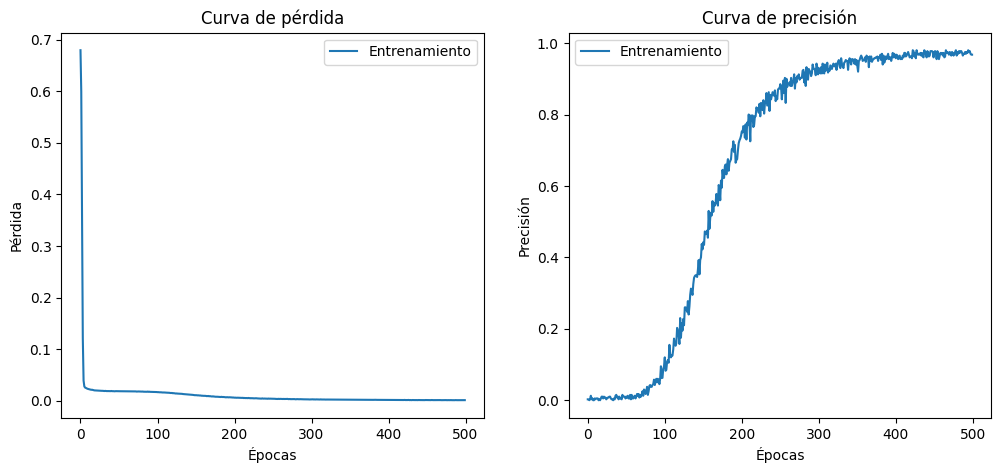

In [ ]:
# Función para graficar Underfitting y Overfitting
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.title('Curva de pérdida')

    # Precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.title('Curva de precisión')

    plt.show()

# Mostrar las curvas
plot_history(history)


In [ ]:
# sacamos el nombre de todas la columnas de df_symtomspç
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
column_names = df_original[0:]
column_names

,code,name,symptoms,treatments
0,1,Panic disorder,"Palpitations, Sweating, Trembling, Shortness of breath, Fear of losing control, Dizziness","Antidepressant medications, Cognitive Behavioral Therapy, Relaxation Techniques"
1,2,Vocal cord polyp,"Hoarseness, Vocal Changes, Vocal Fatigue","Voice Rest, Speech Therapy, Surgical Removal"
2,3,Turner syndrome,"Short stature, Gonadal dysgenesis, Webbed neck, Lymphedema","Growth hormone therapy, Estrogen replacement therapy, Cardiac and renal evaluations"
3,4,Cryptorchidism,"Absence or undescended testicle(s), empty scrotum, smaller or underdeveloped testicle(s), inguinal hernia, abnormal positioning of the testicle(s) (higher in the groin area)","Observation and monitoring (in cases of mild or transient cryptorchidism), hormone therapy (to stimulate testicular descent), surgical intervention (orchiopexy) to reposition the testicle(s) into the scrotum, if necessary, performed around the age of 6 to 12 months, open or laparoscopic surgery (in cases of high or persistent cryptorchidism), testicular prostheses (in cases of absent or non-functional testicles), regular follow-up visits with a urologist or pediatric surgeon"
4,5,Ethylene glycol poisoning-1,"Nausea, vomiting, abdominal pain, General malaise, weakness, Increased thirst, frequent urination","Supportive Measures, Gastric Decontamination, Antidote Administration, Hemodialysis"
5,6,Ethylene glycol poisoning-2,"Metabolic acidosis, apid breathing, rapid heart rate, confusion, headache, dizziness, seizures","Blood tests, Supportive Measures, Gastric Decontamination, Antidote Administration, Hemodialysis"
6,7,Ethylene glycol poisoning-3,"Decreased urine output, swelling in the legs and ankles, and signs of fluid overload, Severe kidney damage","Supportive Measures, Gastric Decontamination, Antidote Administration, Hemodialysis"
7,8,Atrophic vaginitis,"Vaginal dryness, Vaginal burning, frequent urination, urinary tract infections, Painful intercourse","Vaginal moisturizers, Vaginal estrogen therapy, Lifestyle modifications"
8,9,Fracture,"Pain, Swelling, Bruising, Deformity, Difficulty moving, Loss of function","Immobilization, Surgery, Rehabilitation"
9,10,Cellulitis,"Redness, Pain, tenderness, Swelling, Skin changes, Lymph node enlargement","Antibiotics, Warm compresses, immobilization, rest, Pain management"


In [ ]:
def predict_all_diseases_with_treatments(symptom_input):
    # Convertimos los síntomas de entrada a minúsculas
    symptom_input = [symptom.lower() for symptom in symptom_input]

    # Nos aseguramos de que los nombres de las columnas también estén en minúsculas
    X.columns = [col.lower() for col in X.columns]

    # Creamos el vector de síntomas sin importar mayúsculas o minúsculas
    symptom_vector = np.array([[1 if symptom in symptom_input else 0 for symptom in X.columns]])

    probabilities = model.predict(symptom_vector)[0]
    disease_probabilities = {mlb.classes_[i]: prob for i, prob in enumerate(probabilities)}
    sorted_diseases = sorted(disease_probabilities.items(), key=lambda x: x[1], reverse=True)

    results = []
    for disease, probability in sorted_diseases:
        if probability >= 0.01:  # Umbral del 1%
            treatment_row = df_treatments[df_treatments['name'] == disease]  # 'name' en minúsculas
            if not treatment_row.empty:
                treatments = [col for col in df_treatments.columns[3:] if treatment_row.iloc[0][col] == 1]
                treatments = treatments if treatments else ["No hay tratamientos disponibles"]
            else:
                treatments = ["No hay tratamientos disponibles"]
            results.append((disease, probability, treatments))

    return results


# Ejemplo de predicción
symptom_example = ["Anxiety", "Shortness of Breath", "sweating", "trembling"]
predictions = predict_all_diseases_with_treatments(symptom_example)

print("Enfermedades predichas con tratamientos:")
for disease, probability, treatments in predictions:
    print(f"{disease}: {probability:.2%}")
    print(f"Tratamientos: {', '.join(treatments)}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Enfermedades predichas con tratamientos:
Panic disorder: 30.86%
Tratamientos: antidepressant medications, behavioral, behavioral therapy, cognitive behavioral therapy, medication, medications, relaxation techniques, therapy

